A short notebook to estimate the value of a ticket for a flight and what class to travel.  

In [3]:
import pylab as pl
import numpy as np

In [4]:
cost_per_hour = 150 # this is the rate estimated in dollars for an astropy developers time


## Simple model

In a very simple model, a developer has zero productivity riding in economy class.   The total cost to the project is then the cost of the flight plus the developer time x the length of the flight.

In buisiness class, the developer can at least be somewhat productive except outside of the landing time.   In this case, we can estimate that 80% of the time that the developer can be productive.  In this case, the project can recover 80% of the time while incurring the increase cost of the ticket.   So the project can recover some of the cost of the travel. 


In [77]:
def cost_simple_model(length_of_flight, cost_per_hour, cost_of_ticket, percent_productive_time):
    return length_of_flight*cost_per_hour * (1.0 - percent_productive_time/100.0) + cost_of_ticket

In [78]:
cost_simple_model(4, cost_per_hour, 400, 0) - cost_simple_model(4, cost_per_hour, 400, 80)

480.0

In [79]:
cost_simple_model(8, cost_per_hour, 400, 0) - cost_simple_model(8, cost_per_hour, 400, 80)

960.0

This model actually reduces down to be just the length of the flight times the cost per hour times the percentage of productive time.   If we assume someone can ony be productive for 8 hours, then we can limit that as the maximum cost savings for the flight. 

In [80]:
def savings(length_of_time, cost_per_hour, percent_productive_time):
    mask = (length_of_time > 8)
    temp = 1.0 * length_of_time
    temp[mask] = 8
    return temp *cost_per_hour*percent_productive_time

In [81]:
ticket_price = np.arange(0,2000, 100)

In [82]:
length_of_time = np.arange(0,16,1)

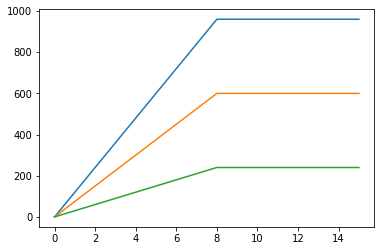

In [83]:
pl.plot(length_of_time, savings(length_of_time, cost_per_hour, 0.8))
pl.plot(length_of_time, savings(length_of_time, cost_per_hour, 0.5))
pl.plot(length_of_time, savings(length_of_time, cost_per_hour, 0.2))

pl.show()

In [84]:
print(savings(np.array([2, 7, 8]), cost_per_hour, 0.8))
print(savings(np.array([2, 7, 8]), cost_per_hour, 0.5))
print(savings(np.array([2, 7, 8]), cost_per_hour, 0.2))

[240. 840. 960.]
[150. 525. 600.]
[ 60. 210. 240.]


More complex models could be constructed for the lenght of the flight and destination

## Typical Cost of flight

Googling a number of flights indicates that the cost of a flight is currently around $ \$100$ per hour traveled.  As such, a reasonable metric for when flight costs would need to be justified would be when they are above $ \$100$ x length of travel + $0.5 \ x \ \$150 $ x length of travel or above $\$175$ x length of travel in hours for the shortest flight between two places.  

